The Bernstein–Vazirani algorithm, is a quantum algorithm that guesses a string of binary numbers in one shot.

In [8]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [9]:
secretnumber = '101001'

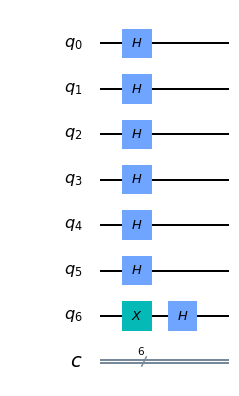

In [10]:
circuit = QuantumCircuit(6+1,6)
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.draw(output = 'mpl')

cx gate wherever 1 in the secret number.

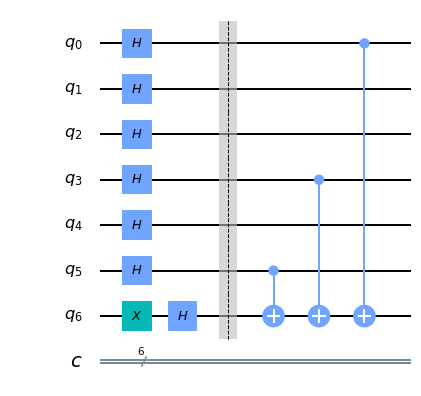

In [11]:
circuit.barrier()
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
circuit.draw(output = 'mpl')

In [12]:
circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier()

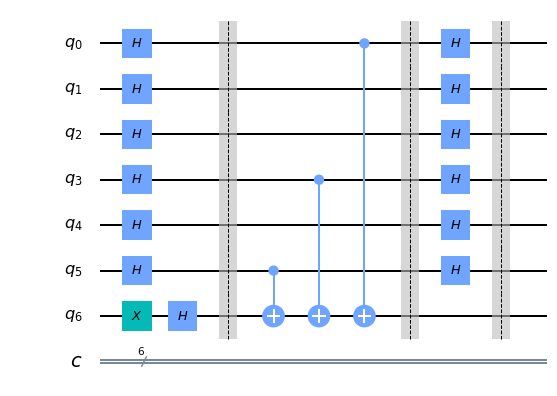

In [13]:
circuit.draw(output = 'mpl')

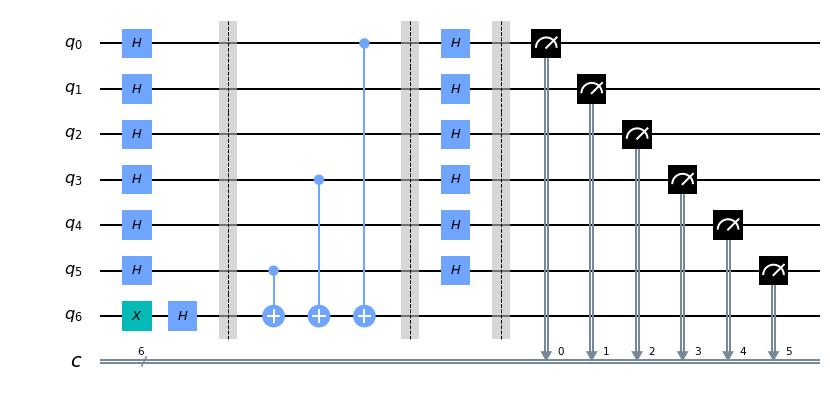

In [14]:
circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.draw(output = 'mpl')

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


Generalising the algorithm

In [23]:
secretnumber2 = '101001'
circuit2 = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

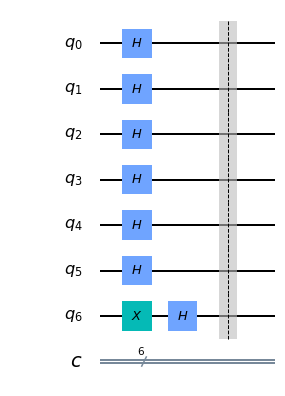

In [25]:
circuit2.h(range(len(secretnumber)))
circuit2.x(len(secretnumber))
circuit2.h(len(secretnumber))
circuit2.barrier()
circuit2.draw(output = 'mpl')

In [26]:
for ii, yesno in enumerate(reversed(secretnumber)):
    if(yesno == '1'):
        circuit2.cx(ii, len(secretnumber))


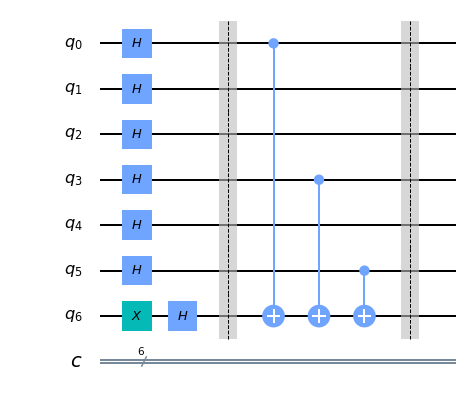

In [27]:
circuit2.barrier()
circuit2.draw(output='mpl')

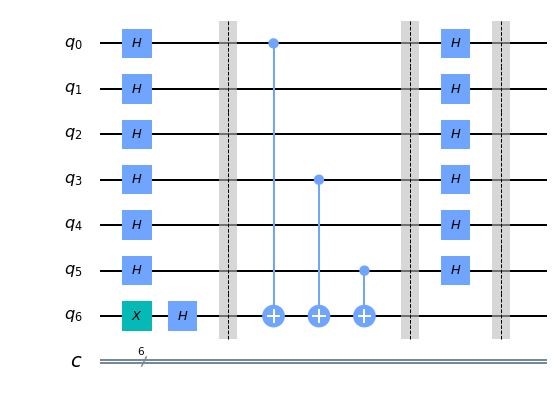

In [28]:
circuit2.h(range(len(secretnumber)))
circuit2.barrier()
circuit2.draw(output='mpl')

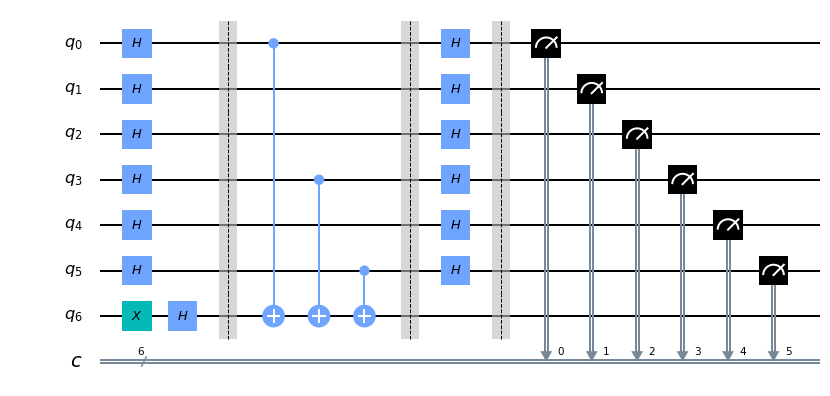

In [29]:
circuit2.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit2.draw(output='mpl')

In [32]:
simulator2 = Aer.get_backend('qasm_simulator')
result2 = execute(circuit2, backend = simulator2, shots = 1).result()
counts2 = result2.get_counts()
print(counts2)

{'101001': 1}
